In [2]:
!pip install --upgrade scikit-learn imbalanced-learn --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

In [5]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.shape
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [14]:
print(df.describe())

           loan_id   no_of_dependents    education   self_employed  \
count  4269.000000        4269.000000  4269.000000     4269.000000   
mean   2135.000000           2.498712     0.497775        0.503631   
std    1232.498479           1.695910     0.500054        0.500045   
min       1.000000           0.000000     0.000000        0.000000   
25%    1068.000000           1.000000     0.000000        0.000000   
50%    2135.000000           3.000000     0.000000        1.000000   
75%    3202.000000           4.000000     1.000000        1.000000   
max    4269.000000           5.000000     1.000000        1.000000   

        income_annum   loan_amount    loan_term   cibil_score  \
count   4.269000e+03  4.269000e+03  4269.000000   4269.000000   
mean    5.059124e+06  1.513345e+07    10.900445    599.936051   
std     2.806840e+06  9.043363e+06     5.709187    172.430401   
min     2.000000e+05  3.000000e+05     2.000000    300.000000   
25%     2.700000e+06  7.700000e+06     6.000

In [8]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numerical Columns: 10
Categorical Columns: 3


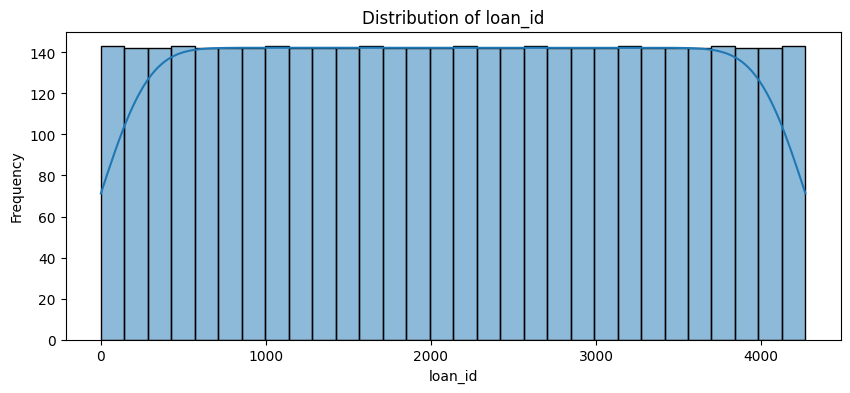

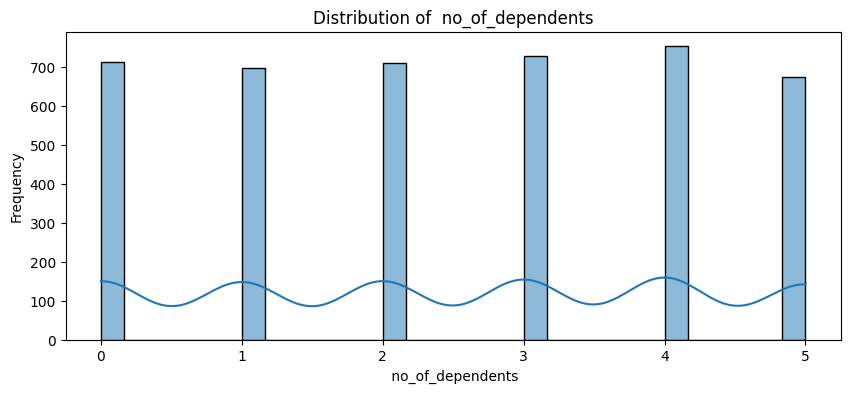

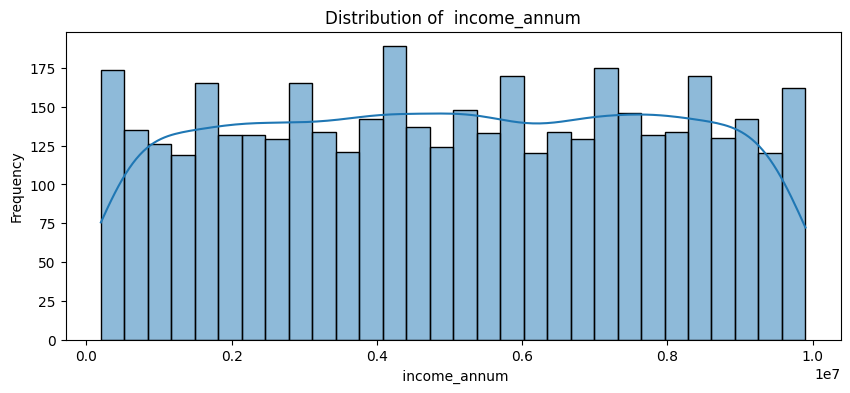

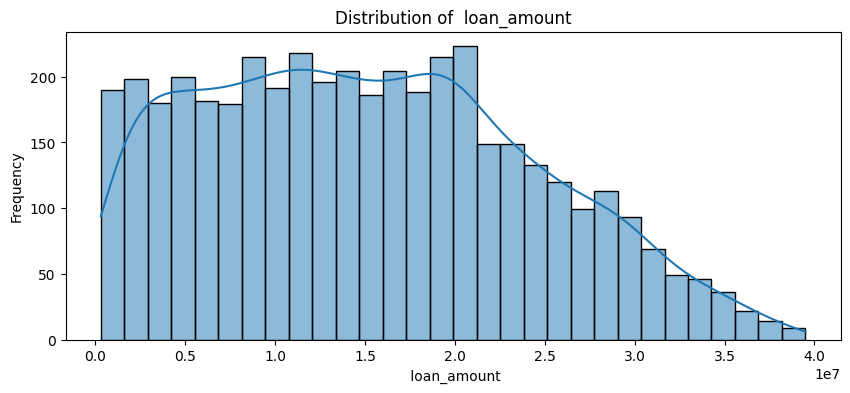

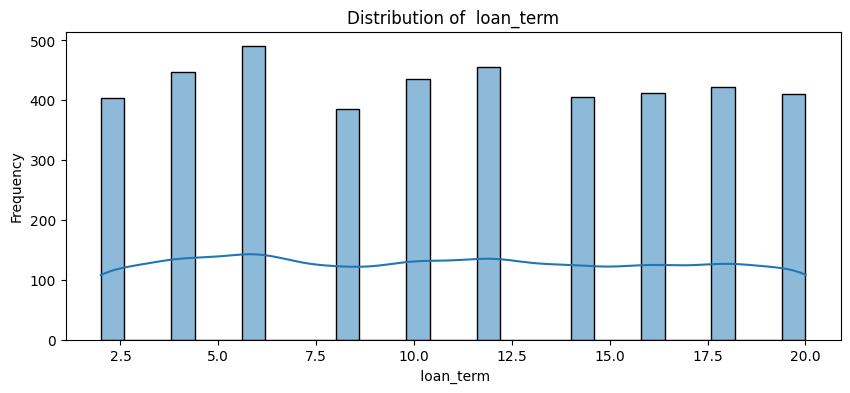

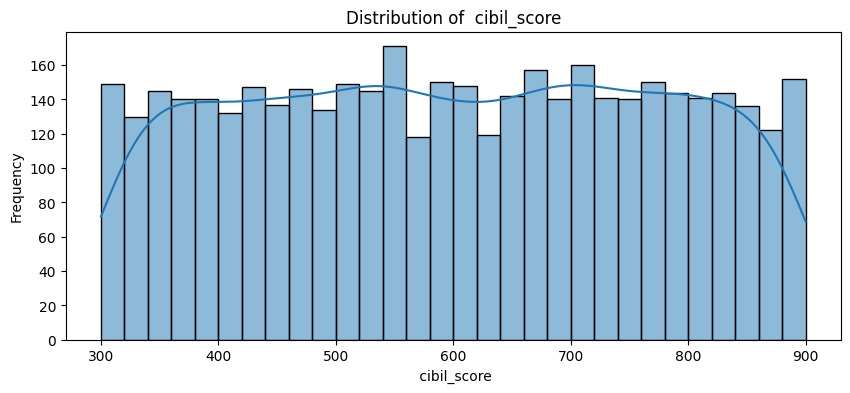

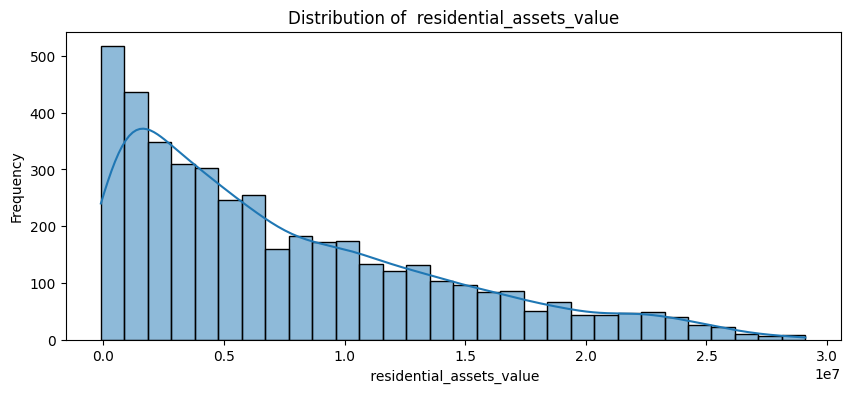

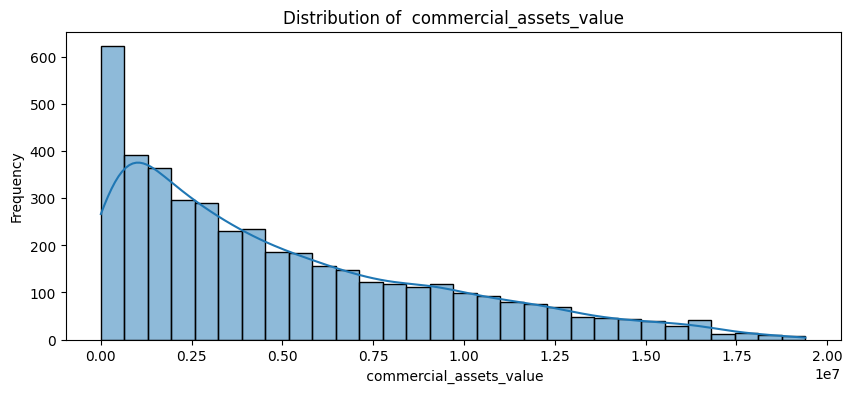

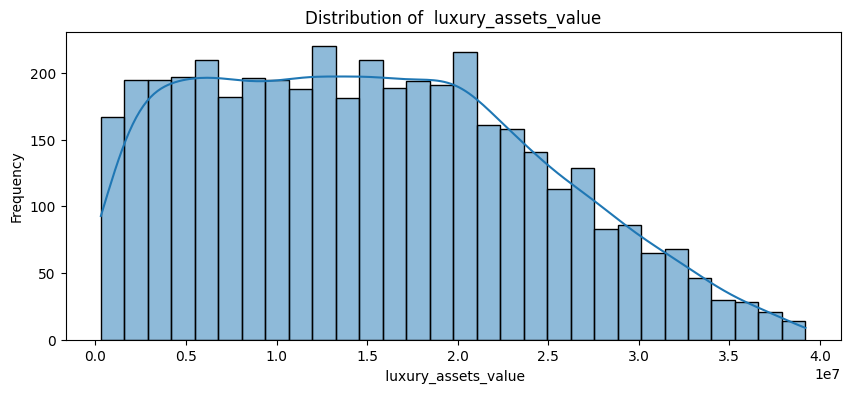

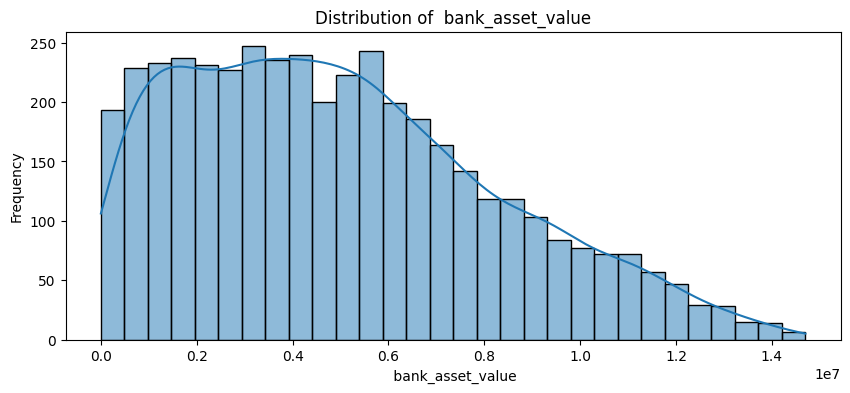

In [9]:
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


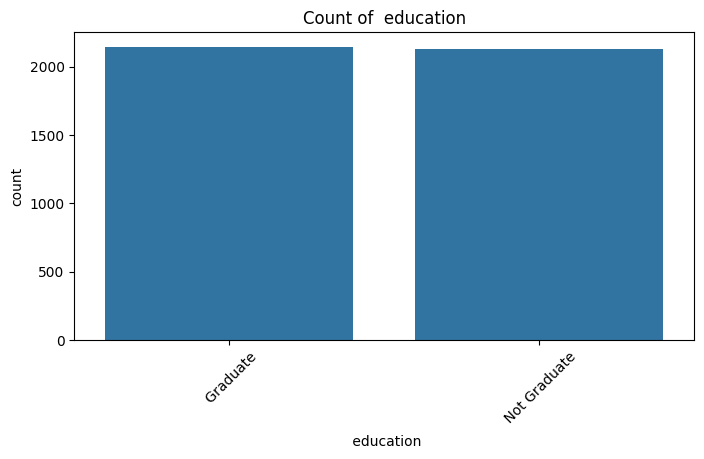

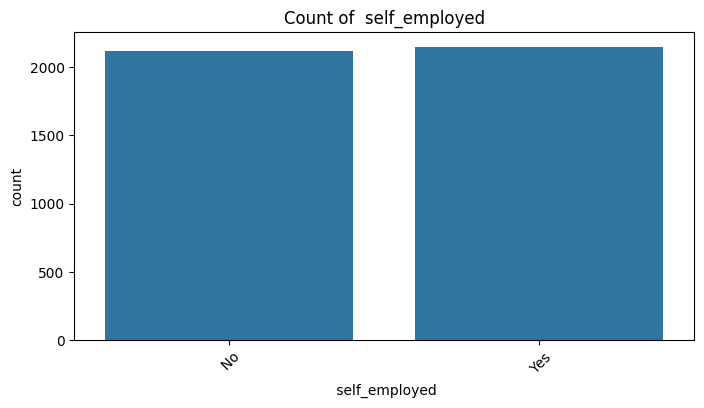

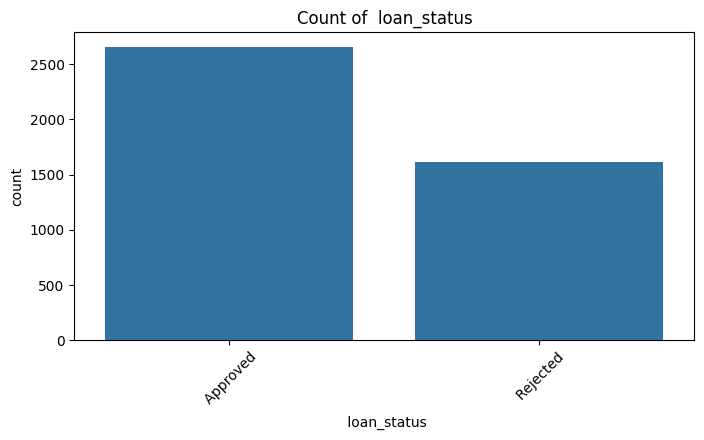

In [10]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [11]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [13]:
X = df.drop(columns=['loan_id', ' loan_status'])
y = df[' loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 98.24%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.97      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confusion Matrix:
 [[527   4]
 [ 11 312]]
